In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from keras.layers.advanced_activations import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from sklearn.utils import shuffle 
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [3]:
Wufeng = df['SiteName'].isin(['霧峰']) #找霧峰測站
df[Wufeng]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
460307,461602,霧峰,臺中市,50.0,細懸浮微粒,良好,2.5,0.7,NaN,6,...,50.0,15.0,15.6,NaN,NaN,NaN,NaN,2017/10/12 22:00,NaN,NaN
460393,461688,霧峰,臺中市,49.0,細懸浮微粒,良好,2.7,0.7,NaN,3,...,46.0,15.0,15.2,NaN,NaN,NaN,NaN,2017/10/12 23:00,NaN,NaN
460441,461736,霧峰,臺中市,46.0,細懸浮微粒,良好,2.6,0.7,NaN,1,...,43.0,14.0,14.4,NaN,NaN,NaN,NaN,2017/10/13 00:00,NaN,NaN
460499,461794,霧峰,臺中市,45.0,細懸浮微粒,良好,3.0,0.8,NaN,1,...,42.0,14.0,13.1,NaN,NaN,NaN,NaN,2017/10/13 01:00,NaN,NaN
460587,461882,霧峰,臺中市,42.0,細懸浮微粒,良好,2.6,0.7,NaN,1,...,40.0,13.0,11.8,NaN,NaN,NaN,NaN,2017/10/13 02:00,NaN,NaN
460754,462049,霧峰,臺中市,41.0,細懸浮微粒,良好,2.5,0.7,NaN,1,...,40.0,13.0,11.8,NaN,NaN,NaN,NaN,2017/10/13 03:00,NaN,NaN
460838,462133,霧峰,臺中市,38.0,細懸浮微粒,良好,2.4,0.7,NaN,1,...,39.0,12.0,11.0,NaN,NaN,NaN,NaN,2017/10/13 04:00,NaN,NaN
461163,462458,霧峰,臺中市,31.0,懸浮微粒,良好,2.5,0.6,NaN,1,...,33.0,9.0,13.0,NaN,NaN,NaN,NaN,2017/10/13 08:00,NaN,NaN
461252,462547,霧峰,臺中市,33.0,細懸浮微粒,良好,2.9,0.5,NaN,1,...,34.0,10.0,18.5,NaN,NaN,NaN,NaN,2017/10/13 09:00,NaN,NaN
461368,462663,霧峰,臺中市,32.0,懸浮微粒,良好,2.3,0.5,NaN,2,...,35.0,10.0,15.8,NaN,NaN,NaN,NaN,2017/10/13 10:00,NaN,NaN


In [4]:
Wufeng = df['SiteName'].isin(['霧峰']) #找霧峰測站
Wufeng=df[Wufeng].fillna(method='ffill').drop(columns=['SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','WindSpeed','WindDirec','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column

Wufeng

,SO2,CO,O3,PM10,PM25,NO2
0,2.5,0.7,6,50.0,15.0,15.6
1,2.7,0.7,3,46.0,15.0,15.2
2,2.6,0.7,1,43.0,14.0,14.4
3,3.0,0.8,1,42.0,14.0,13.1
4,2.6,0.7,1,40.0,13.0,11.8
5,2.5,0.7,1,40.0,13.0,11.8
6,2.4,0.7,1,39.0,12.0,11.0
7,2.5,0.6,1,33.0,9.0,13.0
8,2.9,0.5,1,34.0,10.0,18.5
9,2.3,0.5,2,35.0,10.0,15.8


In [5]:
bbb=Wufeng['PM10']>50
#Wufeng['PM10']=Wufeng['PM10'].astype("int")
#Wufeng['PM10']=Wufeng['PM10'].apply(lambda x: [y if y <= 200 else np.nan for y in x])
Wufeng['PM10'].replace(2,np.nan, inplace=True)


In [6]:
Wufeng.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值
 
Wufeng

,SO2,CO,O3,PM10,PM25,NO2
0,2.5,0.70,6.0,50.0,15.0,15.6
1,2.7,0.70,3.0,46.0,15.0,15.2
2,2.6,0.70,1.0,43.0,14.0,14.4
3,3.0,0.80,1.0,42.0,14.0,13.1
4,2.6,0.70,1.0,40.0,13.0,11.8
5,2.5,0.70,1.0,40.0,13.0,11.8
6,2.4,0.70,1.0,39.0,12.0,11.0
7,2.5,0.60,1.0,33.0,9.0,13.0
8,2.9,0.50,1.0,34.0,10.0,18.5
9,2.3,0.50,2.0,35.0,10.0,15.8


In [7]:
aaa=Wufeng['PM10']>200
Wufeng[aaa]

,SO2,CO,O3,PM10,PM25,NO2


In [8]:
Wufeng.fillna(method='ffill', inplace=True) #以前面數字來取代0值

Wufeng

,SO2,CO,O3,PM10,PM25,NO2
0,2.5,0.70,6.0,50.0,15.0,15.6
1,2.7,0.70,3.0,46.0,15.0,15.2
2,2.6,0.70,1.0,43.0,14.0,14.4
3,3.0,0.80,1.0,42.0,14.0,13.1
4,2.6,0.70,1.0,40.0,13.0,11.8
5,2.5,0.70,1.0,40.0,13.0,11.8
6,2.4,0.70,1.0,39.0,12.0,11.0
7,2.5,0.60,1.0,33.0,9.0,13.0
8,2.9,0.50,1.0,34.0,10.0,18.5
9,2.3,0.50,2.0,35.0,10.0,15.8


In [9]:
Wufeng['pr']=''
#Wufeng.drop([ 0,1],inplace=True)
#Wufeng.reset_index(drop=True,inplace=True)
#000

Wufeng.to_csv('Wufengpollution.csv')

Wufeng

,SO2,CO,O3,PM10,PM25,NO2,pr
0,2.5,0.70,6.0,50.0,15.0,15.6,
1,2.7,0.70,3.0,46.0,15.0,15.2,
2,2.6,0.70,1.0,43.0,14.0,14.4,
3,3.0,0.80,1.0,42.0,14.0,13.1,
4,2.6,0.70,1.0,40.0,13.0,11.8,
5,2.5,0.70,1.0,40.0,13.0,11.8,
6,2.4,0.70,1.0,39.0,12.0,11.0,
7,2.5,0.60,1.0,33.0,9.0,13.0,
8,2.9,0.50,1.0,34.0,10.0,18.5,
9,2.3,0.50,2.0,35.0,10.0,15.8,


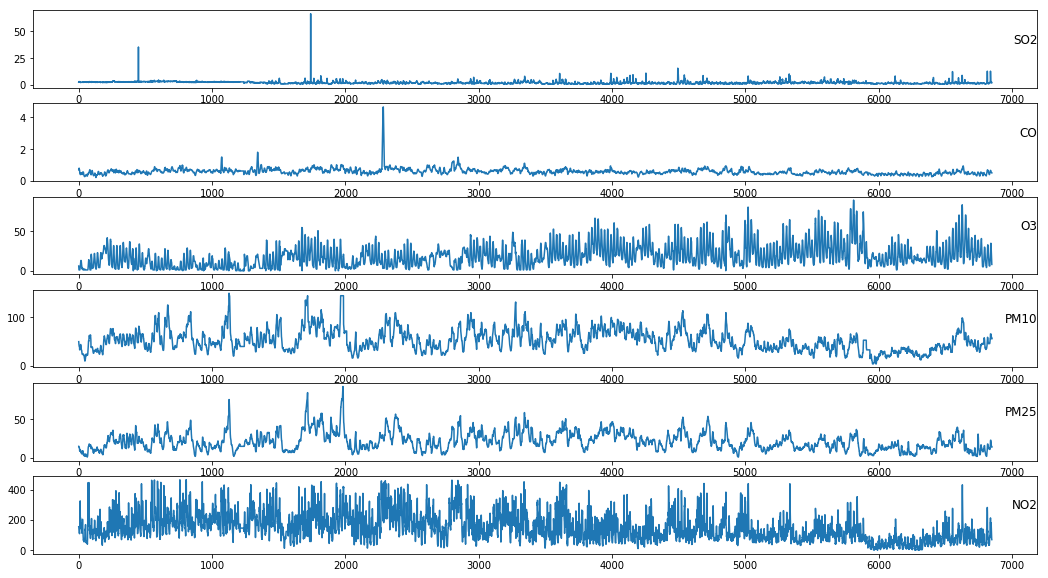

In [10]:
# load dataset
dataset =pd.read_csv('Wufengpollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,5] = encoder.fit_transform(values[:,5])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4,5]
i=1
plt.figure(figsize=(18,10)) 
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[0:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [11]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,CO,O3,PM10,PM25,NO2,pr
0,0.406553,0.530693,-0.912283,-0.151097,-0.564458,0.080727,15.0
1,0.550010,0.530693,-1.122682,-0.330059,-0.564458,0.036199,15.0
2,0.478282,0.530693,-1.262949,-0.464281,-0.648800,-0.052857,14.0
3,0.765196,1.013520,-1.262949,-0.509021,-0.648800,-0.197573,14.0
4,0.478282,0.530693,-1.262949,-0.598502,-0.733143,-0.342289,13.0
5,0.406553,0.530693,-1.262949,-0.598502,-0.733143,-0.342289,13.0
6,0.334824,0.530693,-1.262949,-0.643243,-0.817485,-0.431346,12.0
7,0.406553,0.047867,-1.262949,-0.911686,-1.070512,-0.208705,9.0
8,0.693467,-0.434960,-1.262949,-0.866946,-0.986170,0.403555,10.0
9,0.263096,-0.434960,-1.192815,-0.822205,-0.986170,0.102991,10.0


In [12]:
def train_window(df,ref_hr=66,pr_hr=6):
    X_train,Y_train=[],[]
    for i in range(df.shape[0]-pr_hr-ref_hr): 
        X_train.append(np.array(df.iloc[i:i+ref_hr,:-1])) 
        Y_train.append(np.array(df.iloc[i+ref_hr:i+ref_hr+pr_hr]["pr"]))
#        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
        #选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]] 
        #"，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。 
        #需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train) 



In [13]:
#將次序打亂 資料亂序 將資料打散，而非照日期排序
#def shuffle(X,Y):
#    np.random.seed(10)
 #   randomList = np.arange(X.shape[0])
 #   np.random.shuffle(randomList)
 #   return X[randomList], Y[randomList]

In [14]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data


def splitData(X, Y, rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

Instructions for updating:
Colocations handled automatically by placer.


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  del sys.path[0]
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(12, 6))`
  del sys.path[0]


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                18176     
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

Epoch 58/500
5534/5534 [==============================] - 1s 240us/step - loss: 30.6841 - val_loss: 20.4582
Epoch 59/500
5534/5534 [==============================] - 1s 270us/step - loss: 31.7986 - val_loss: 19.7430
Epoch 60/500
5534/5534 [==============================] - 1s 264us/step - loss: 30.6208 - val_loss: 20.0521
Epoch 61/500
5534/5534 [==============================] - 2s 289us/step - loss: 30.4112 - val_loss: 20.0771
Epoch 62/500
5534/5534 [==============================] - 1s 249us/step - loss: 30.8863 - val_loss: 19.1357
Epoch 63/500
5534/5534 [==============================] - 1s 263us/step - loss: 30.6414 - val_loss: 19.4713
Epoch 64/500
5534/5534 [==============================] - 1s 237us/step - loss: 30.1655 - val_loss: 19.7449
Epoch 65/500
5534/5534 [==============================] - 1s 269us/step - loss: 30.0586 - val_loss: 19.1678
Epoch 66/500
5534/5534 [==============================] - 1s 265us/step - loss: 30.7621 - val_loss: 18.8540
Epoch 67/500
5534/5534 [====

5534/5534 [==============================] - 1s 255us/step - loss: 24.7576 - val_loss: 16.4936
Epoch 134/500
5534/5534 [==============================] - 1s 269us/step - loss: 25.8340 - val_loss: 16.5589
Epoch 135/500
5534/5534 [==============================] - 1s 270us/step - loss: 25.1642 - val_loss: 16.2623
Epoch 136/500
5534/5534 [==============================] - 1s 258us/step - loss: 24.3664 - val_loss: 16.4026
Epoch 137/500
5534/5534 [==============================] - 1s 259us/step - loss: 25.9642 - val_loss: 16.4762
Epoch 138/500
5534/5534 [==============================] - 1s 241us/step - loss: 24.8018 - val_loss: 16.6457
Epoch 139/500
5534/5534 [==============================] - 1s 254us/step - loss: 24.9021 - val_loss: 16.1233
Epoch 140/500
5534/5534 [==============================] - 1s 263us/step - loss: 25.2161 - val_loss: 16.3429
Epoch 141/500
5534/5534 [==============================] - 1s 257us/step - loss: 25.0633 - val_loss: 16.8933
Epoch 142/500
5534/5534 [========

5534/5534 [==============================] - 1s 253us/step - loss: 21.7410 - val_loss: 14.4226
Epoch 209/500
5534/5534 [==============================] - 1s 255us/step - loss: 22.4979 - val_loss: 14.3999
Epoch 210/500
5534/5534 [==============================] - 1s 251us/step - loss: 22.0519 - val_loss: 14.6183
Epoch 211/500
5534/5534 [==============================] - 1s 253us/step - loss: 22.4022 - val_loss: 14.4562
Epoch 212/500
5534/5534 [==============================] - 1s 256us/step - loss: 21.7086 - val_loss: 13.9153
Epoch 213/500
5534/5534 [==============================] - 1s 249us/step - loss: 22.3016 - val_loss: 14.3405
Epoch 214/500
5534/5534 [==============================] - 2s 273us/step - loss: 21.5695 - val_loss: 13.9692
Epoch 215/500
5534/5534 [==============================] - 1s 244us/step - loss: 21.3522 - val_loss: 14.2437
Epoch 216/500
5534/5534 [==============================] - 1s 261us/step - loss: 22.3724 - val_loss: 14.6334
Epoch 217/500
5534/5534 [========

5534/5534 [==============================] - 1s 268us/step - loss: 19.7280 - val_loss: 12.9352
Epoch 284/500
5534/5534 [==============================] - 1s 270us/step - loss: 19.7574 - val_loss: 12.3962
Epoch 285/500
5534/5534 [==============================] - 1s 260us/step - loss: 19.8313 - val_loss: 12.1266
Epoch 286/500
5534/5534 [==============================] - 1s 253us/step - loss: 19.7120 - val_loss: 12.2557
Epoch 287/500
5534/5534 [==============================] - 1s 264us/step - loss: 20.0558 - val_loss: 12.0502
Epoch 288/500
5534/5534 [==============================] - 1s 268us/step - loss: 19.5126 - val_loss: 12.4511
Epoch 289/500
5534/5534 [==============================] - 1s 253us/step - loss: 20.6831 - val_loss: 13.5881
Epoch 290/500
5534/5534 [==============================] - 1s 256us/step - loss: 20.0912 - val_loss: 12.3733
Epoch 291/500
5534/5534 [==============================] - 1s 243us/step - loss: 19.3310 - val_loss: 12.6356
Epoch 292/500
5534/5534 [========

5534/5534 [==============================] - 1s 243us/step - loss: 17.7014 - val_loss: 11.8476
Epoch 359/500
5534/5534 [==============================] - 1s 239us/step - loss: 18.5360 - val_loss: 11.8914
Epoch 360/500
5534/5534 [==============================] - 1s 250us/step - loss: 17.4108 - val_loss: 11.5067
Epoch 361/500
5534/5534 [==============================] - 1s 253us/step - loss: 17.3409 - val_loss: 10.8546
Epoch 362/500
5534/5534 [==============================] - 1s 243us/step - loss: 17.4926 - val_loss: 10.8324
Epoch 363/500
5534/5534 [==============================] - 1s 257us/step - loss: 17.2456 - val_loss: 11.1403
Epoch 364/500
5534/5534 [==============================] - 1s 246us/step - loss: 18.6505 - val_loss: 11.4304
Epoch 365/500
5534/5534 [==============================] - 1s 252us/step - loss: 18.0352 - val_loss: 10.7379
Epoch 366/500
5534/5534 [==============================] - 1s 249us/step - loss: 18.1774 - val_loss: 10.8553
Epoch 367/500
5534/5534 [========

5534/5534 [==============================] - 1s 262us/step - loss: 16.6404 - val_loss: 10.1310
Epoch 434/500
5534/5534 [==============================] - 1s 267us/step - loss: 17.1001 - val_loss: 9.3423
Epoch 435/500
5534/5534 [==============================] - 1s 246us/step - loss: 16.4183 - val_loss: 9.4679
Epoch 436/500
5534/5534 [==============================] - 1s 245us/step - loss: 15.8481 - val_loss: 10.1807
Epoch 437/500
5534/5534 [==============================] - 1s 258us/step - loss: 16.3606 - val_loss: 9.6942
Epoch 438/500
5534/5534 [==============================] - 1s 248us/step - loss: 15.8429 - val_loss: 9.5950
Epoch 439/500
5534/5534 [==============================] - 1s 250us/step - loss: 16.4645 - val_loss: 9.6003
Epoch 440/500
5534/5534 [==============================] - 1s 249us/step - loss: 16.7119 - val_loss: 10.0104
Epoch 441/500
5534/5534 [==============================] - 1s 252us/step - loss: 15.5489 - val_loss: 9.3329
Epoch 442/500
5534/5534 [==============

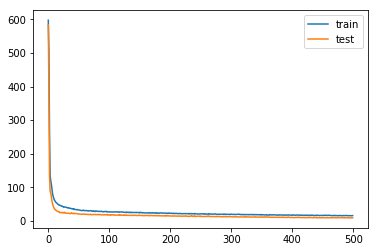

In [15]:
#model
# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,12,7)

X_train ,Y_train = shuffle(X_train , Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)


def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)

history=model.fit(X_train, Y_train, epochs=500, batch_size=300, validation_split= 0.1)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model
model.save('Wufengmodel.h5')
del model

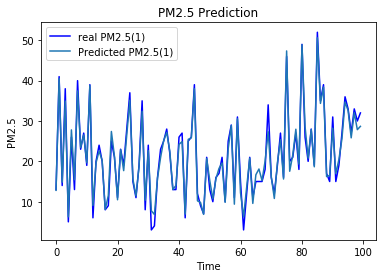

Train 0.676044885347211
Validation 0.6383601756954612
1.492508291786421e+31
The R2 score on the Test set is:	0.942
Train Score: 2.55 RMSE
Test Score: 2.85 RMSE
The MSE   on the Test set is: 8.149887761317766
The RMSE  on the Test set is: 2.8548008269085545
The MAE   on the Test set is: 2.108340076461693
The MAPE  on the Test set is: 0.021716158238217848
The SMAPE on the Test set is: 0.018542783072042


In [16]:
#讀取model3
model = load_model('Wufengmodel.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val[0:100,0], color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict[0:100,0], label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)
# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用

